Nama  : Agilar Gumilar

Kls   : TI3G

NIM   : 2141720106

**PRAKTIKUM 1**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

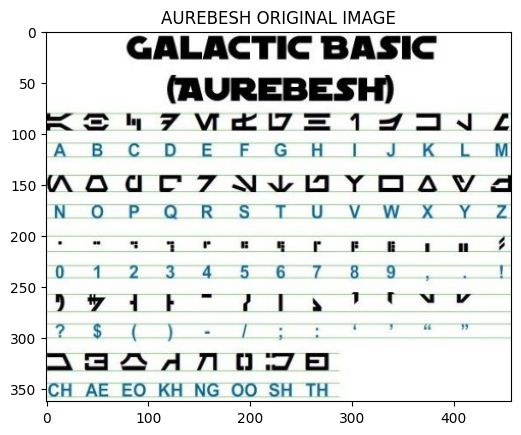

In [ ]:
# Plot original image
import cv2
import matplotlib.pyplot as plt

IMG_DIR = '/content/drive/MyDrive/content/Images/'
image = cv2.imread(IMG_DIR + 'aurebesh.jpg')

# Pastikan gambar berhasil dibaca sebelum melanjutkan
if image is not None:
    b, g, r = cv2.split(image)
    rgb_img = cv2.merge([r, g, b])
    plt.imshow(rgb_img)
    plt.title('AUREBESH ORIGINAL IMAGE')
    plt.show()
else:
    print("Gagal membaca gambar. Pastikan path gambar benar.")

In [ ]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

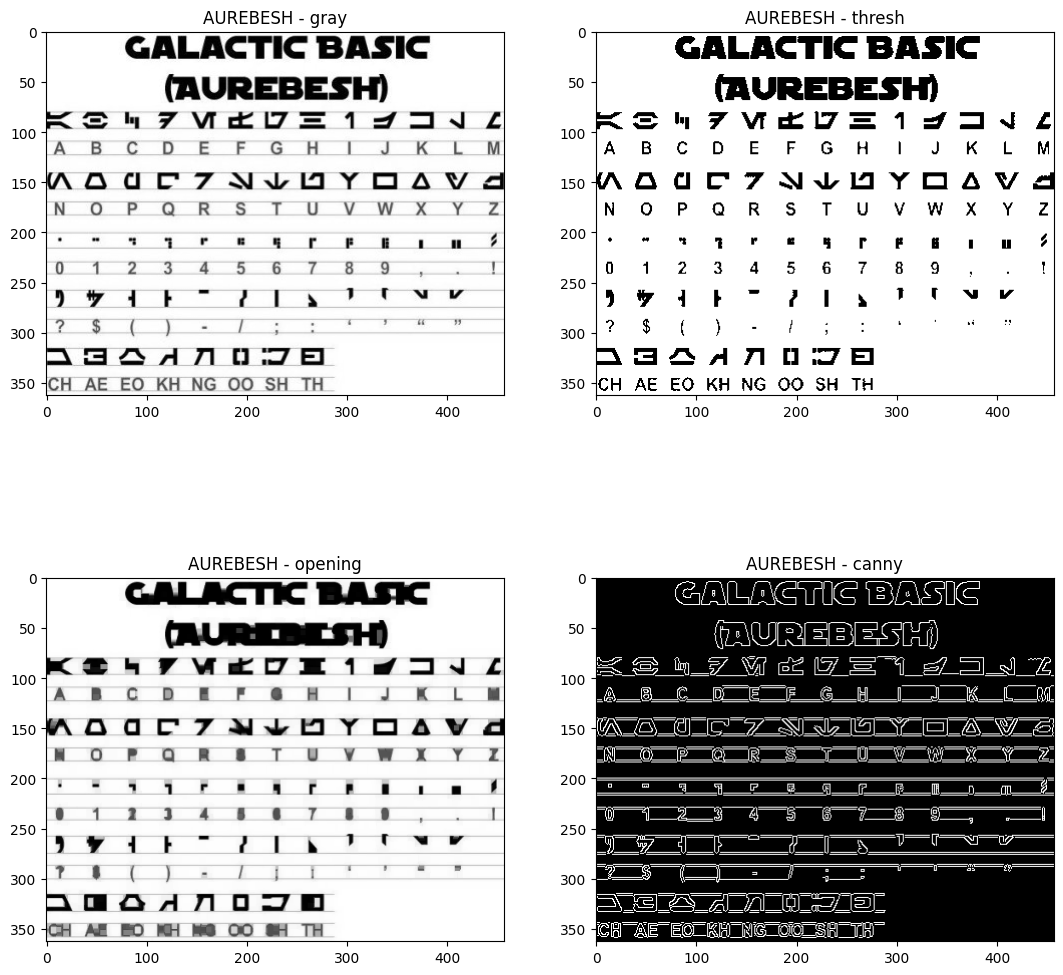

In [ ]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [ ]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
—<ESe7F7VMEVESI1VIaVNe
Ze CD ee ee eT re
AOde7TNVYOYOAVG.A
SO 8 ee TC we
Sse ee
SE eS
a 2, lS a; A
a a a ce a a
ASoSANnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
—<ESe7F7VMEVESI1VIaVNe
Ze CD ee ee eT re
AOde7TNVYOYOAVG.A
SO 8 ee TC we
Sse ee
SE eS
a 2, lS a; A
a a a ce a a
ASoSANnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
—<ESe7F7VMEVESI1VIaVNe
Ze CD ee ee eT re
AOde7TNVYOYOAVG.A
SO 8 ee TC we
Sse ee
SE eS
a 2, lS a; A
a a a ce a a
ASoSANnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-------------------------

**PRAKTIKUM 2**

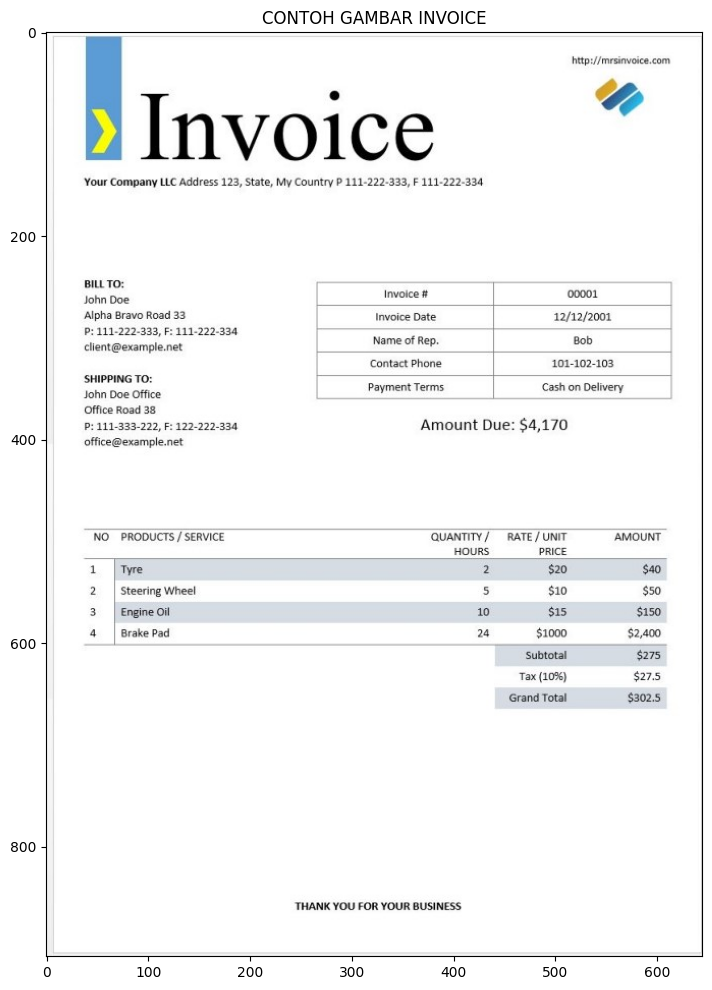

In [ ]:
# Plot gambar original

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()


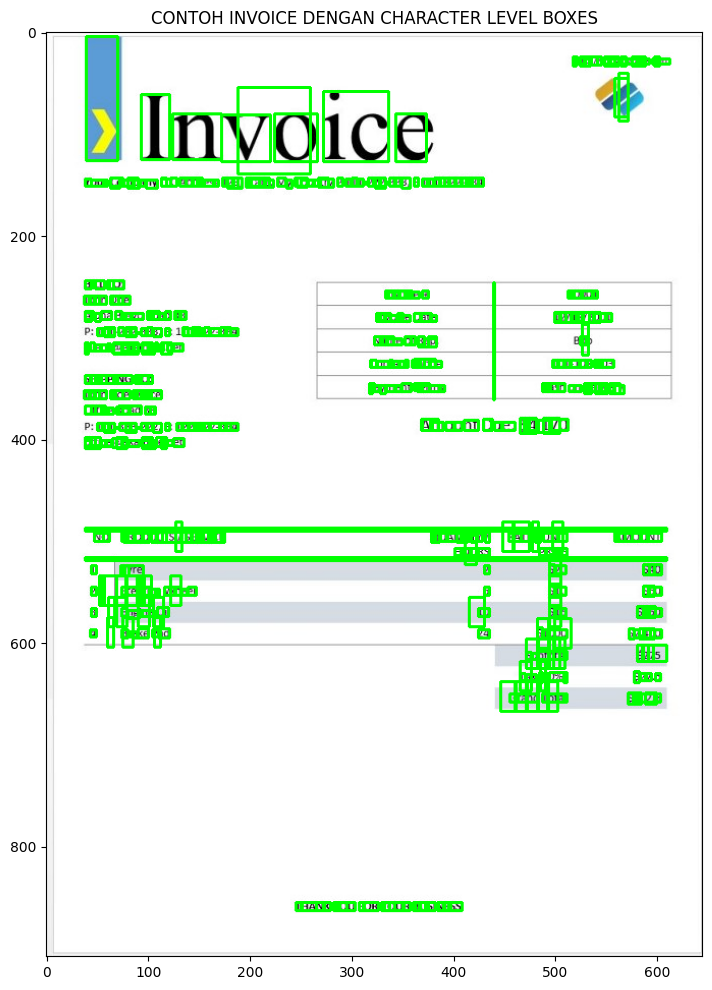

In [ ]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN CHARACTER LEVEL BOXES')
plt.show()


In [ ]:
# Membaca gambar contoh invoice
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())


DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


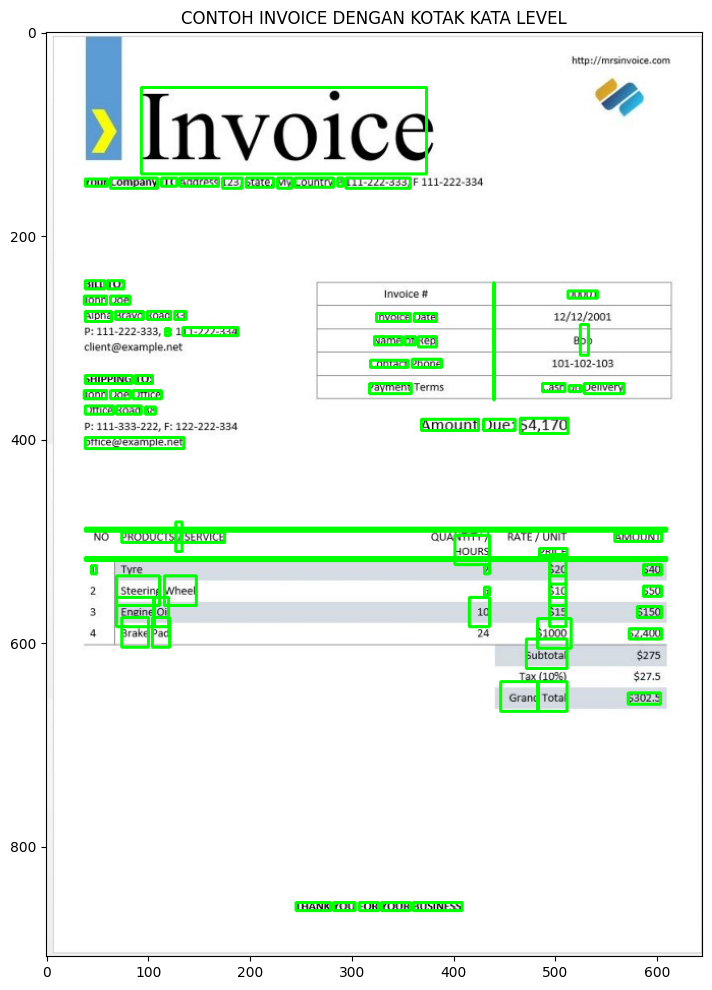

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK KATA LEVEL')
plt.show()


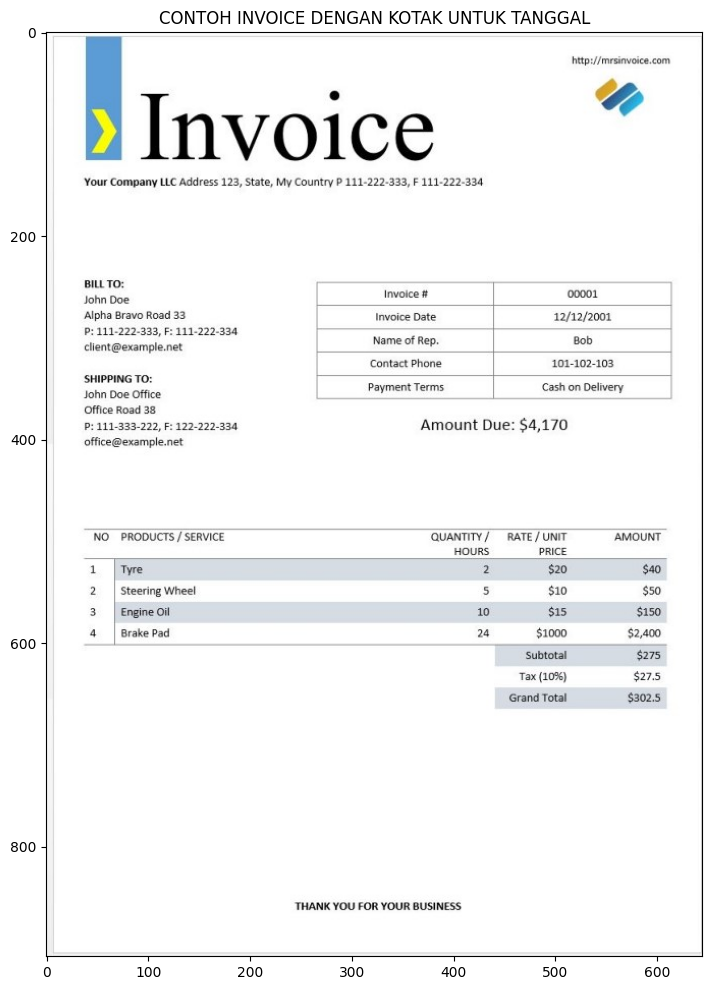

In [ ]:
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Pola tanggal dalam format dd/mm/yyyy
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
        if re.match(date_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK UNTUK TANGGAL')
plt.show()

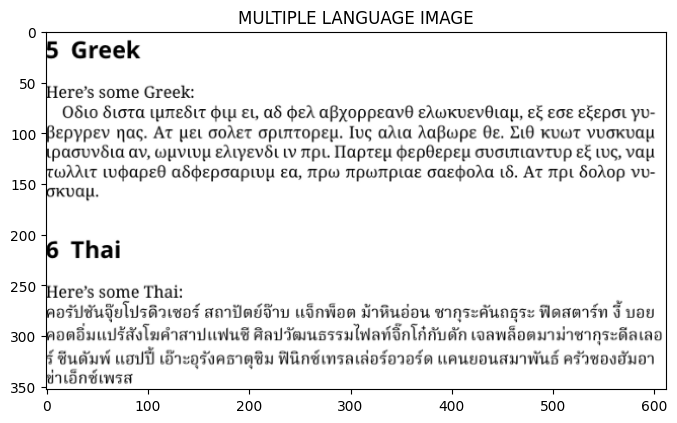

In [ ]:
# Membaca gambar asli
image = cv2.imread(IMG_DIR + 'greek-thai.png')

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

In [ ]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(image, config=custom_config))



5 Greek
Here’s some Greek:

Oto Stata wrestt Oy et, a5 eA aByoppeave ekwkvEvOLay, EE Ede EEEPAL yU-
Bepypev nas. At wet coAet oputtopeLL. Tuc aAta AaBwpe Oe. EO Kvwt vvoKvap
(paUVéta av, wUVIVH EAtyevdt tv MPL. Haptep bepOepep avatmtavtup e€ WE, VAL
TWAAIT WOapED ASGeEpoapLH Ea, TPW MPwRpiae caeHoAa 18. AT Mpt SA0p vu-
oKUGH.

6 Thai

Here’s some Thai: .
nowidugulusdaved amiaddow uimion iiniudou winssdungs: Maaorsn § vow
nmonduulsdoladranunud Aaviausssallavdnalddudn wawioawaiwiqsedaiao
§ Gudini woul Wazgssas g@y Hiindinsadosor04a unuvouawtud avavooduer
judnsiwsa



**TUGAS**

1. Persiapan Gambar:

  *   Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').
  *   Tampilkan gambar asli menggunakan Python dan OpenCV.



2. Deteksi Orientasi dan Skrip:

    *   Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
    *   Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).
    *   Tampilkan hasil orientasi dan jenis skrip.
    





In [ ]:
!sudo apt install tesseract-ocr # menginstal Tesseract OCR di lingkungan Linux.
!pip install pytesseract # Menginstal pustaka Pytesseract, yang merupakan antarmuka Python untuk Tesseract OCR.
!pip install tesseract # Menginstal pustaka Tesseract melalui PyPI.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


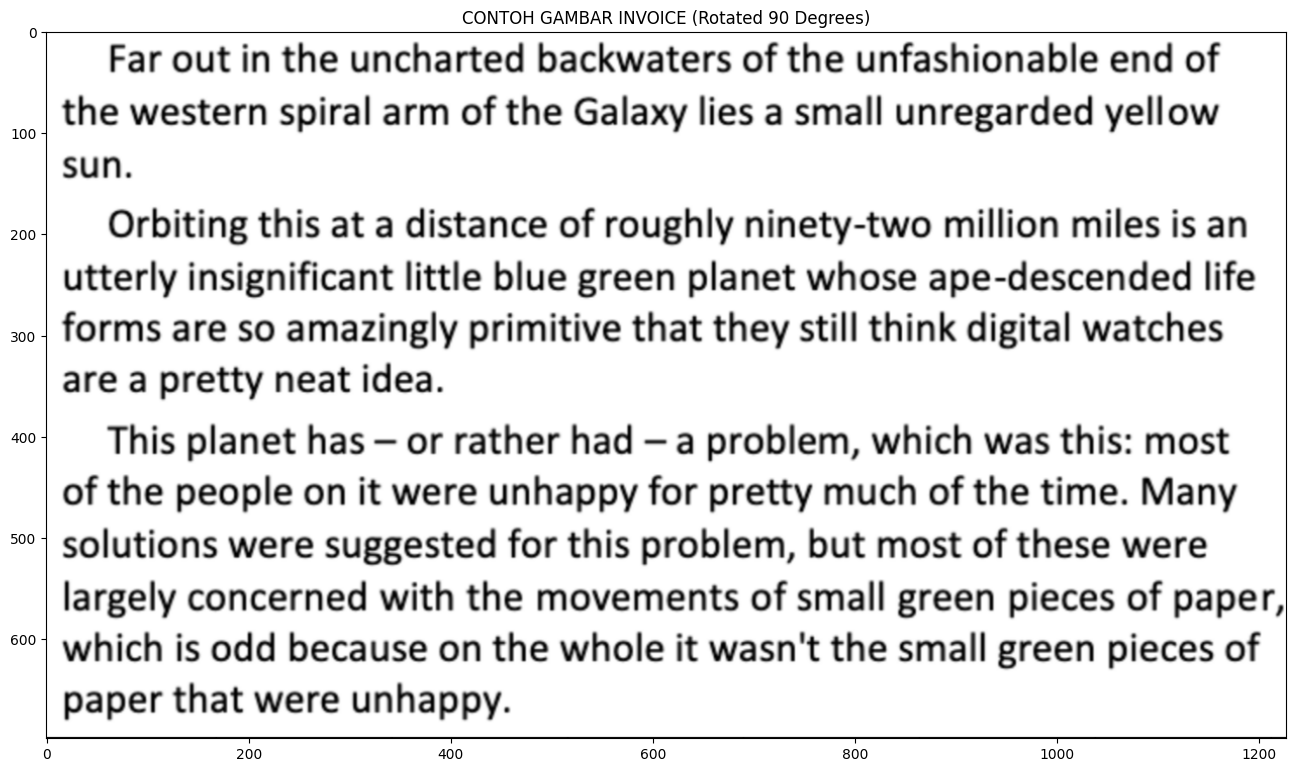

Orientasi Teks: 1.5707963705062866 derajat
Jenis Skrip: 

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had —a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.

 



In [ ]:
import cv2 # OpenCV adalah pustaka komputer vision yang digunakan untuk memproses gambar.
import pytesseract # Antarmuka Python untuk Tesseract OCR
import numpy as np # Numpy digunakan untuk manipulasi array dan operasi matriks.
from matplotlib import pyplot as plt # untuk menampilkan gambar dengan Matplotlib.

# Membaca gambar dari direktori
image = cv2.imread('/content/drive/MyDrive/content/Images/hitchhikers-rotated.png')


# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(rotated_image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE (Rotated 90 Degrees)')
plt.show()

# Konversi gambar ke grayscale
gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Temukan garis menggunakan transformasi Hough
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Ambil sudut rotasi dari garis yang terdeteksi
angle = lines[0][0][1] if lines is not None else 0

# Menggunakan Tesseract untuk mendapatkan jenis skrip
script_type = pytesseract.image_to_string(rotated_image)

# Tampilkan hasil orientasi dan jenis skrip
print(f"Orientasi Teks: {angle} derajat")
print(f"Jenis Skrip: \n\n{script_type}")